In [1]:
import pandas as pd
import numpy as np
import gc

import os
import sys
sys.path.append("../")

from Feature.feature import Feature
import Tool.config as config

from sklearn.metrics import log_loss
from sklearn import preprocessing
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle(config.data_prefix_path + 'data.pkl')

In [3]:
object_features = ["predict_category_1","predict_category_2","predict_category_0",
                    "predict_property_0","predict_property_1","predict_property_2",
                    "property_1","property_0","property_2",
                    "category_1","category_0","category_2",
                    'category_cross_0', 'category_cross_1', 'category_cross_2',
                    'hour_and_category_1',
                    'user_gender_id','user_occupation_id',]

In [4]:
features = [c for c in data.columns if c not in ['is_trade', 'instance_id','index',
                                            'context_id', 'time', 'day','context_timestamp',
                                            'property_list','category_list','property_predict_list','category_predict_list',
                                            'item_category_list', 'item_property_list', 'predict_category_property',
                                            'user_id','item_id','item_brand_id','item_city_id','shop_id',
                                            ]
            and c not in object_features]
target = ['is_trade']

In [5]:
'''
labelEncoding = preprocessing.LabelEncoder()
data['predict_category_0'] = data['predict_category_0'].apply(lambda x:np.nan if x == '-1' else x)
for col in object_features:
    data[col] = labelEncoding.fit_transform(data[col].astype(str))
'''

"\nlabelEncoding = preprocessing.LabelEncoder()\ndata['predict_category_0'] = data['predict_category_0'].apply(lambda x:np.nan if x == '-1' else x)\nfor col in object_features:\n    data[col] = labelEncoding.fit_transform(data[col].astype(str))\n"

In [6]:
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]
del data
gc.collect()

7

In [7]:
print(train.shape)
print(test.shape)

(478032, 361)
(42888, 361)


In [8]:
params = {  'booster':'gbtree', 
            'num_leaves':35, 
            'max_depth':7, 
            'eta':0.05, 
            'max_bin':425, 
            'subsample_for_bin':50000, 
            'objective':'binary:logistic', 
            'min_split_gain':0,
            'min_child_weight':6, 
            'min_child_samples':10, 
            'subsample':1,
            'colsample_bytree':1, 
            'lambda':4,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
            'alpha':4,   #L1正则化 
            'seed':2018,
            'nthread':7, 
            'silent':True,
            'gamma':0.1,
            'eval_metric':'logloss'
         }

## 线下验证

In [9]:
X_train = train[train.day < 24]
X_val = train[train.day == 24]

In [10]:
xgb_train = xgb.DMatrix(X_train[features], label=X_train[target])
xgb_val = xgb.DMatrix(X_val[features],label=X_val[target])

In [11]:
del X_train,X_val
gc.collect()

26

In [12]:
num_rounds = 5000 # 迭代次数
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

In [22]:
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(params, xgb_train, num_rounds, watchlist,early_stopping_rounds=80)

[0]	train-logloss:0.648024	val-logloss:0.647773
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 80 rounds.
[1]	train-logloss:0.6072	val-logloss:0.606728
[2]	train-logloss:0.570103	val-logloss:0.56941
[3]	train-logloss:0.536261	val-logloss:0.535388
[4]	train-logloss:0.50529	val-logloss:0.504233
[5]	train-logloss:0.476862	val-logloss:0.475627
[6]	train-logloss:0.450702	val-logloss:0.449298
[7]	train-logloss:0.426575	val-logloss:0.425012
[8]	train-logloss:0.404277	val-logloss:0.402551
[9]	train-logloss:0.383632	val-logloss:0.381774
[10]	train-logloss:0.364486	val-logloss:0.362419
[11]	train-logloss:0.346709	val-logloss:0.344502
[12]	train-logloss:0.330179	val-logloss:0.327853
[13]	train-logloss:0.314792	val-logloss:0.312328
[14]	train-logloss:0.300453	val-logloss:0.297854
[15]	train-logloss:0.287074	val-logloss:0.284311
[16]	train-logloss:0.274588	val-logloss:0.271699
[17]	train-logloss:0.262919	val-lo

[164]	train-logloss:0.080039	val-logloss:0.079682
[165]	train-logloss:0.079958	val-logloss:0.079668
[166]	train-logloss:0.079898	val-logloss:0.079655
[167]	train-logloss:0.079848	val-logloss:0.079649
[168]	train-logloss:0.079806	val-logloss:0.079638
[169]	train-logloss:0.079735	val-logloss:0.079621
[170]	train-logloss:0.079716	val-logloss:0.079623
[171]	train-logloss:0.079657	val-logloss:0.079617
[172]	train-logloss:0.079586	val-logloss:0.079603
[173]	train-logloss:0.07954	val-logloss:0.079603
[174]	train-logloss:0.079497	val-logloss:0.079591
[175]	train-logloss:0.079476	val-logloss:0.079588
[176]	train-logloss:0.079399	val-logloss:0.07958
[177]	train-logloss:0.079336	val-logloss:0.079589
[178]	train-logloss:0.079283	val-logloss:0.079586
[179]	train-logloss:0.079235	val-logloss:0.079587
[180]	train-logloss:0.079194	val-logloss:0.079588
[181]	train-logloss:0.079164	val-logloss:0.079587
[182]	train-logloss:0.079141	val-logloss:0.079586
[183]	train-logloss:0.079084	val-logloss:0.07958
[18

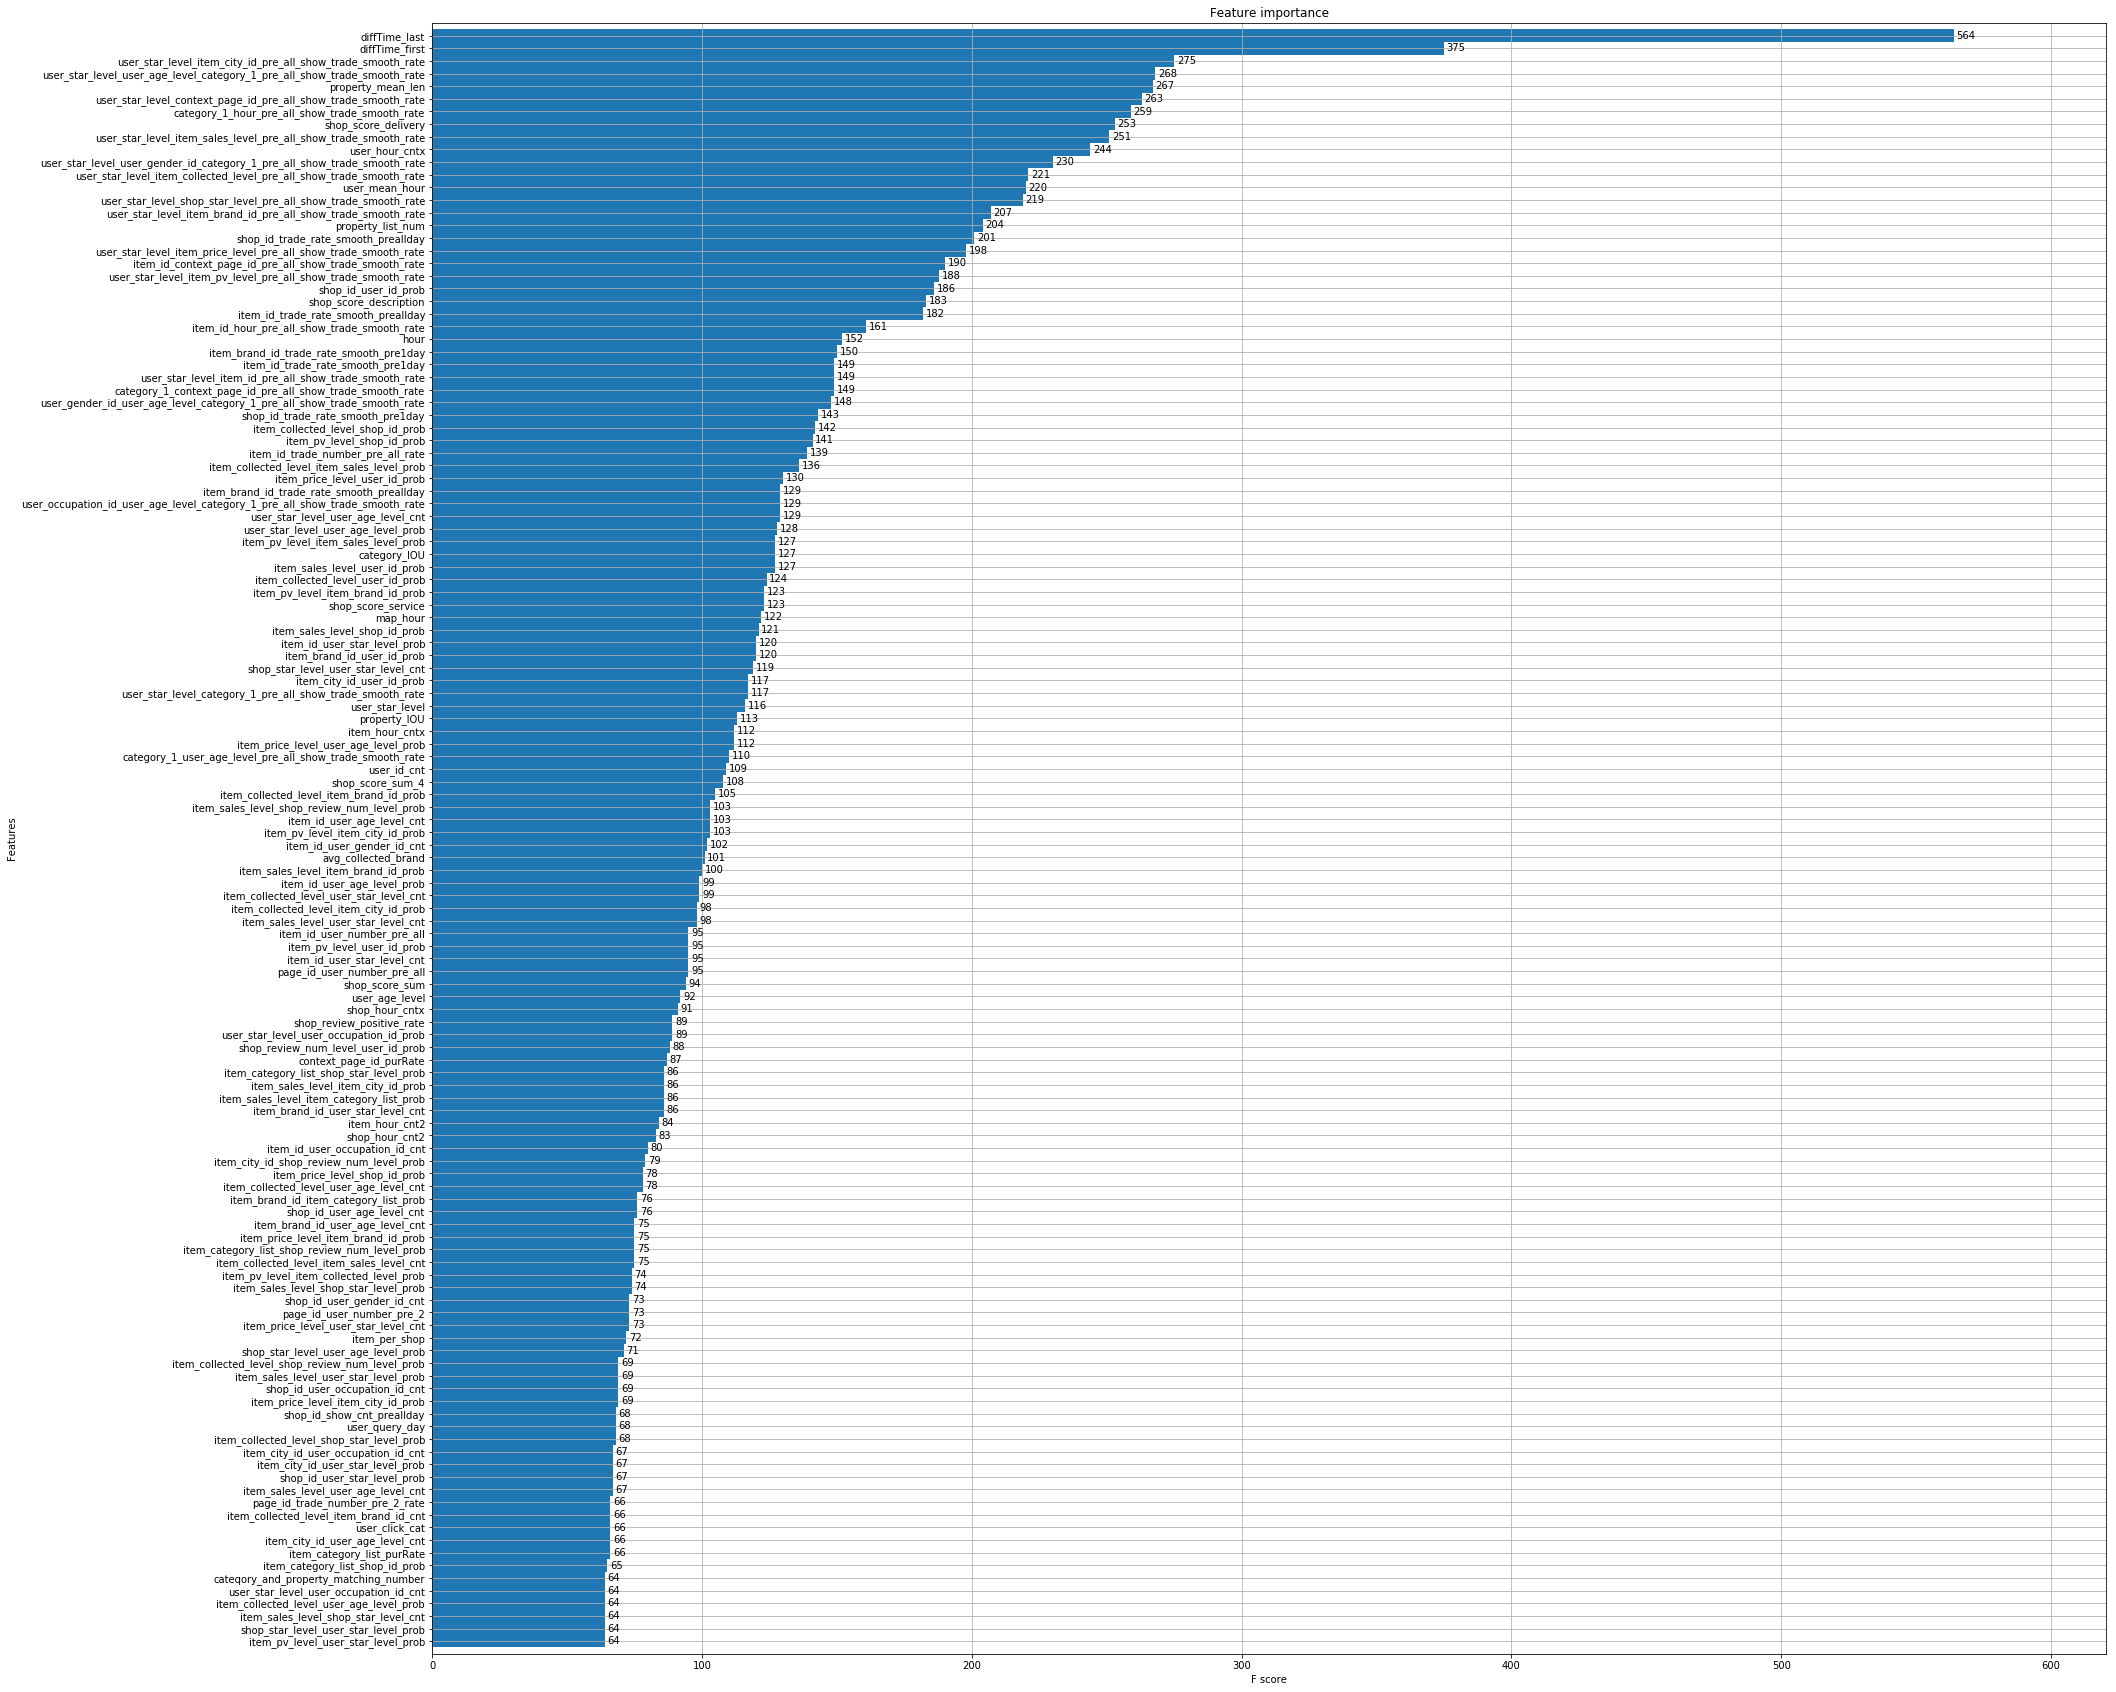

In [14]:
fig,ax = plt.subplots(figsize=(30,30))
xgb.plot_importance(model,
                  height=1.0,
                  ax=ax,
                  max_num_features=128)
plt.show()

In [25]:
del model 
del xgb_train,xgb_val
gc.collect()

0

## 线上提交

In [9]:
xgb_train = xgb.DMatrix(train[features], label=train[target])
xgb_test = xgb.DMatrix(test[features])

In [10]:
del train
gc.collect()

13

In [11]:
num_rounds = 220
watchlist = [(xgb_train, 'train')]

In [12]:
model = xgb.train(params, xgb_train, num_rounds, watchlist)

[0]	train-logloss:0.647974
[1]	train-logloss:0.607105
[2]	train-logloss:0.569964
[3]	train-logloss:0.536086
[4]	train-logloss:0.505077
[5]	train-logloss:0.476615
[6]	train-logloss:0.450423
[7]	train-logloss:0.426266
[8]	train-logloss:0.403939
[9]	train-logloss:0.383268
[10]	train-logloss:0.364101
[11]	train-logloss:0.3463
[12]	train-logloss:0.329747
[13]	train-logloss:0.314332
[14]	train-logloss:0.299969
[15]	train-logloss:0.286571
[16]	train-logloss:0.274061
[17]	train-logloss:0.262369
[18]	train-logloss:0.25144
[19]	train-logloss:0.241214
[20]	train-logloss:0.231637
[21]	train-logloss:0.22267
[22]	train-logloss:0.214262
[23]	train-logloss:0.206385
[24]	train-logloss:0.198997
[25]	train-logloss:0.192061
[26]	train-logloss:0.185548
[27]	train-logloss:0.179442
[28]	train-logloss:0.173704
[29]	train-logloss:0.168321
[30]	train-logloss:0.163262
[31]	train-logloss:0.158509
[32]	train-logloss:0.15404
[33]	train-logloss:0.149846
[34]	train-logloss:0.145901
[35]	train-logloss:0.142191
[36]	tr

In [13]:
test['predicted_score'] = model.predict(xgb_test)

In [14]:
test[['instance_id', 'predicted_score']].to_csv(config.data_prefix_path + 'sub0420_xgboost.txt',sep=" ",index=False)

## OOF

In [9]:
from sklearn.model_selection import KFold
folds=KFold(n_splits=4,random_state=2018,shuffle=True)

In [10]:
del test
gc.collect()

0

In [11]:
pred = np.zeros(len(train))
iters = 0

X_train = train[features].values
y_train = train['is_trade'].values

In [12]:
for n_fold,(trn_idx,val_idx) in enumerate(folds.split(X_train,y_train)):
    
    dtrain = xgb.DMatrix(X_train[trn_idx],y_train[trn_idx])
    dvalid = xgb.DMatrix(X_train[val_idx],y_train[val_idx])
    watchlist = [(dtrain, 'train'),(dvalid,'val')]
    
    model = xgb.train(
        params=params, 
        dtrain = dtrain, 
        num_boost_round = 1000, 
        evals = watchlist,
        early_stopping_rounds=100,
        verbose_eval  = False)
    
    pred[val_idx] = model.predict(dvalid,ntree_limit=model.best_iteration)
    loss = log_loss(y_train[val_idx],pred[val_idx])
    iters += model.best_iteration
    print("\t Fold %d : %.6f in %3d rounds" % (n_fold + 1, loss, model.best_iteration))
    
iters /= 4
print("平均迭代次数： "+str(iters))
train['is_trade'+'_oof'] = pred

	 Fold 1 : 0.085866 in 223 rounds
	 Fold 2 : 0.087114 in 190 rounds
	 Fold 3 : 0.086432 in 204 rounds
	 Fold 4 : 0.086523 in 215 rounds
平均迭代次数： 208.0


In [13]:
# 保存结果,用作stacking
train[['instance_id', 'is_trade', 'is_trade'+'_oof']].to_csv(
    config.data_prefix_path + 'xgboost_oof.txt',sep=" ",index=False
    )